In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [133]:
data= pd.read_csv('C:/Users/sebam/Downloads/Python/Monkey pox/Monkeypox data.csv')
data.head()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,None,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,None,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Patient_ID                      25000 non-null  object
 1   Systemic Illness                25000 non-null  object
 2   Rectal Pain                     25000 non-null  bool  
 3   Sore Throat                     25000 non-null  bool  
 4   Penile Oedema                   25000 non-null  bool  
 5   Oral Lesions                    25000 non-null  bool  
 6   Solitary Lesion                 25000 non-null  bool  
 7   Swollen Tonsils                 25000 non-null  bool  
 8   HIV Infection                   25000 non-null  bool  
 9   Sexually Transmitted Infection  25000 non-null  bool  
 10  MonkeyPox                       25000 non-null  object
dtypes: bool(8), object(3)
memory usage: 781.4+ KB


In [134]:
data = data.rename(index=str,columns={'Patient_ID':'patient_id',
                              'Systemic Illness':'systemic_illness',
                              'Rectal Pain':'rectal_pain',
                              'Sore Throat':'sore_throat',
                              'Penile Oedema':'penile_oedema',
                              'Oral Lesions':'oral_lesions',
                              'Solitary Lesion':'solitary_lesion',
                              'Swollen Tonsils':'swollen_tonsils',
                              'HIV Infection':'hiv_infection',
                              'Sexually Transmitted Infection':'STD',
                              'MonkeyPox':'monkeypox'})

In [135]:
data.describe().T

,count,unique,top,freq
patient_id,25000,25000,P0,1
systemic_illness,25000,4,Fever,6382
rectal_pain,25000,2,False,12655
sore_throat,25000,2,True,12554
penile_oedema,25000,2,True,12612
oral_lesions,25000,2,False,12514
solitary_lesion,25000,2,True,12527
swollen_tonsils,25000,2,True,12533
hiv_infection,25000,2,True,12584
STD,25000,2,False,12554


In [7]:
data.nunique()

patient_id          25000
systemic_illness        4
rectal_pain             2
sore_throat             2
penile_oedema           2
oral_lesions            2
solitary_lesion         2
swollen_tonsils         2
hiv_infection           2
STD                     2
monkeypox               2
dtype: int64

In [8]:
data.duplicated().value_counts()

False    25000
dtype: int64

In [9]:
data.corr()

,rectal_pain,sore_throat,penile_oedema,oral_lesions,solitary_lesion,swollen_tonsils,hiv_infection,STD
rectal_pain,1.000000,0.006214,0.005312,0.007747,0.001147,0.002113,0.005764,0.000666
sore_throat,0.006214,1.000000,0.009082,-0.000795,-0.003609,-0.002011,0.000771,-0.001901
penile_oedema,0.005312,0.009082,1.000000,0.003850,0.002781,0.000536,0.003620,-0.005722
oral_lesions,0.007747,-0.000795,0.003850,1.000000,-0.005198,-0.007757,-0.012153,-0.002725
solitary_lesion,0.001147,-0.003609,0.002781,-0.005198,1.000000,0.002874,-0.002335,0.009849
swollen_tonsils,0.002113,-0.002011,0.000536,-0.007757,0.002874,1.000000,-0.004258,-0.006469
hiv_infection,0.005764,0.000771,0.003620,-0.012153,-0.002335,-0.004258,1.000000,0.001309
STD,0.000666,-0.001901,-0.005722,-0.002725,0.009849,-0.006469,0.001309,1.000000


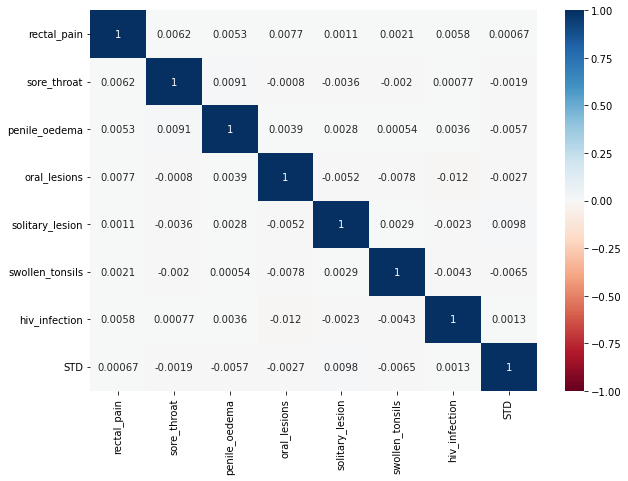

In [6]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), vmax=1, vmin=-1, annot=True, cmap='RdBu')
plt.show()

# DROPPING NON-ESSENTIAL FEATURES

In [136]:
data=data.drop('patient_id',axis=1)
data

,systemic_illness,rectal_pain,sore_throat,penile_oedema,oral_lesions,solitary_lesion,swollen_tonsils,hiv_infection,STD,monkeypox
0,None,False,True,True,True,False,True,False,False,Negative
1,Fever,True,False,True,True,False,False,True,False,Positive
2,Fever,False,True,True,False,False,False,True,False,Positive
3,None,True,False,False,False,True,True,True,False,Positive
4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive
...,...,...,...,...,...,...,...,...,...,...
24995,None,True,True,False,True,True,False,False,True,Positive
24996,Fever,False,True,True,False,True,True,True,True,Positive
24997,None,True,True,False,False,True,True,False,False,Positive
24998,Swollen Lymph Nodes,False,True,False,True,True,True,False,False,Negative


# Explore the target variable

Positive    15909
Negative     9091
Name: monkeypox, dtype: int64


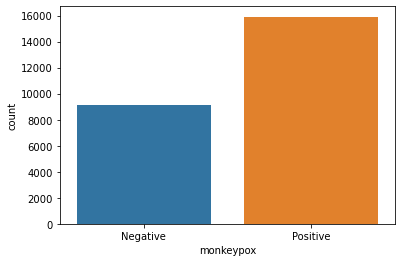

In [12]:
print(data['monkeypox'].value_counts())
sns.countplot(data['monkeypox'])
plt.show()

systemic_illness       monkeypox
Fever                  Negative     1602
                       Positive     4780
Muscle Aches and Pain  Negative     2926
                       Positive     3224
None                   Negative     2892
                       Positive     3324
Swollen Lymph Nodes    Negative     1671
                       Positive     4581
Name: systemic_illness, dtype: int64

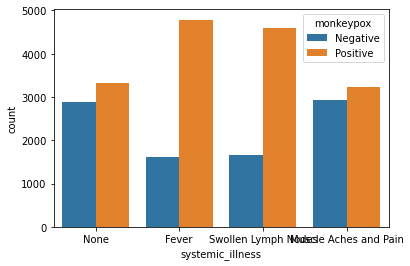

In [13]:
sns.countplot(x=data['systemic_illness'], hue=data['monkeypox'])
data.groupby(by=['systemic_illness','monkeypox'])['systemic_illness'].count()

In [130]:
grp_data = data.groupby(by=['systemic_illness','monkeypox'])['systemic_illness'].count()

In [132]:
print('% who had fever and got MonkeyPox',((grp_data['Fever'][1])/(grp_data['Fever'][1]+grp_data['Fever'][0]))*100)
print('% who had muscle pain and got MonkeyPox',((grp_data['Muscle Aches and Pain'][1])/(grp_data['Muscle Aches and Pain'][1]+grp_data['Muscle Aches and Pain'][0]))*100)
print('% who had no illness but got MonkeyPox',((grp_data['None'][1])/(grp_data['None'][1]+grp_data['None'][0]))*100)
print('% who had swollen lymph and got MonkeyPox',((grp_data['Swollen Lymph Nodes'][1])/(grp_data['Swollen Lymph Nodes'][1]+grp_data['Swollen Lymph Nodes'][0]))*100)

% who had fever and got MonkeyPox 74.89815104982765
% who had muscle pain and got MonkeyPox 52.42276422764227
% who had no illness but got MonkeyPox 53.47490347490348
% who had swollen lymph and got MonkeyPox 73.2725527831094


rectal_pain  monkeypox
False        Negative     5448
             Positive     7207
True         Negative     3643
             Positive     8702
Name: rectal_pain, dtype: int64

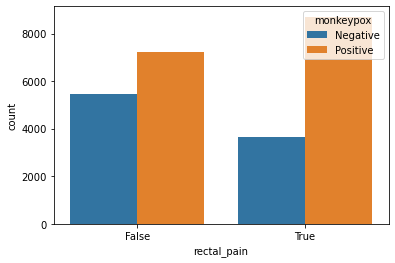

In [29]:
sns.countplot(x=data['rectal_pain'], hue=data['monkeypox'])
data.groupby(by=['rectal_pain','monkeypox'])['rectal_pain'].count()

sore_throat  monkeypox
False        Negative     4907
             Positive     7539
True         Negative     4184
             Positive     8370
Name: sore_throat, dtype: int64

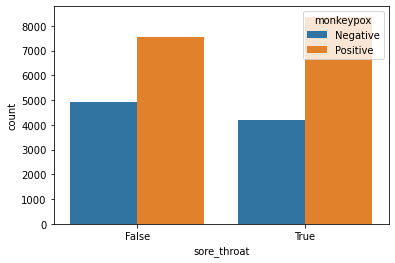

In [30]:
sns.countplot(x=data['sore_throat'], hue=data['monkeypox'])
data.groupby(by=['sore_throat','monkeypox'])['sore_throat'].count()

penile_oedema  monkeypox
False          Negative     4877
               Positive     7511
True           Negative     4214
               Positive     8398
Name: penile_oedema, dtype: int64

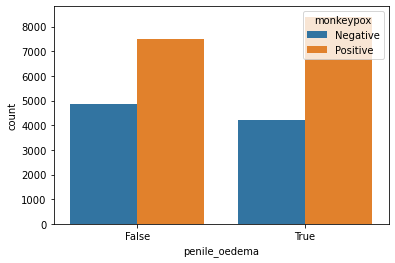

In [26]:
sns.countplot(x=data['penile_oedema'], hue=data['monkeypox'])
data.groupby(by=['penile_oedema','monkeypox'])['penile_oedema'].count()

oral_lesions  monkeypox
False         Negative     4863
              Positive     7651
True          Negative     4228
              Positive     8258
Name: oral_lesions, dtype: int64

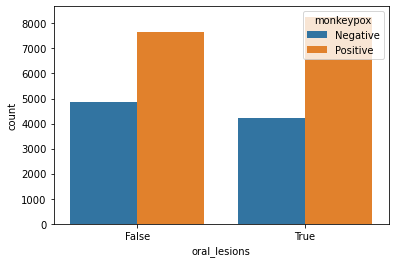

In [27]:
sns.countplot(x=data['oral_lesions'], hue=data['monkeypox'])
data.groupby(by=['oral_lesions','monkeypox'])['oral_lesions'].count()

solitary_lesion  monkeypox
False            Negative     4761
                 Positive     7712
True             Negative     4330
                 Positive     8197
Name: solitary_lesion, dtype: int64

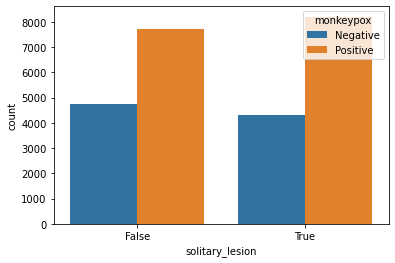

In [28]:
sns.countplot(x=data['solitary_lesion'], hue=data['monkeypox'])
data.groupby(by=['solitary_lesion','monkeypox'])['solitary_lesion'].count()

swollen_tonsils  monkeypox
False            Negative     4613
                 Positive     7854
True             Negative     4478
                 Positive     8055
Name: swollen_tonsils, dtype: int64

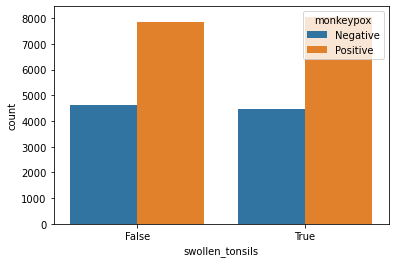

In [31]:
sns.countplot(x=data['swollen_tonsils'], hue=data['monkeypox'])
data.groupby(by=['swollen_tonsils','monkeypox'])['swollen_tonsils'].count()

hiv_infection  monkeypox
False          Negative     5394
               Positive     7022
True           Negative     3697
               Positive     8887
Name: hiv_infection, dtype: int64

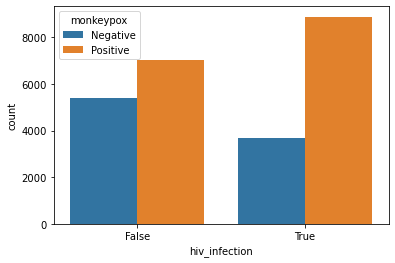

In [32]:
sns.countplot(x=data['hiv_infection'], hue=data['monkeypox'])
data.groupby(by=['hiv_infection','monkeypox'])['hiv_infection'].count()

STD    monkeypox
False  Negative     5307
       Positive     7247
True   Negative     3784
       Positive     8662
Name: STD, dtype: int64

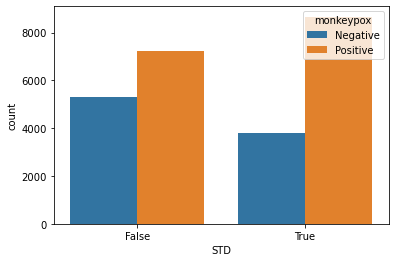

In [33]:
sns.countplot(x=data['STD'], hue=data['monkeypox'])
data.groupby(by=['STD','monkeypox'])['STD'].count()

# Feature Engeneering

In [137]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [138]:
# 0- Negative and 1- Positive
data['monkeypox'] = le.fit_transform(data['monkeypox'])

In [139]:
# 0- False and 1- True
data['rectal_pain'] = le.fit_transform(data['rectal_pain'])
data['sore_throat'] = le.fit_transform(data['sore_throat'])
data['penile_oedema'] = le.fit_transform(data['penile_oedema'])
data['oral_lesions'] = le.fit_transform(data['oral_lesions'])
data['solitary_lesion'] = le.fit_transform(data['solitary_lesion'])
data['swollen_tonsils'] = le.fit_transform(data['swollen_tonsils'])
data['hiv_infection'] = le.fit_transform(data['hiv_infection'])
data['STD'] = le.fit_transform(data['STD'])

In [142]:
data = pd.get_dummies(data)
data.head()

,rectal_pain,sore_throat,penile_oedema,oral_lesions,solitary_lesion,swollen_tonsils,hiv_infection,STD,monkeypox,systemic_illness_Fever,systemic_illness_Muscle Aches and Pain,systemic_illness_None,systemic_illness_Swollen Lymph Nodes
0,0,1,1,1,0,1,0,0,0,0,0,1,0
1,1,0,1,1,0,0,1,0,1,1,0,0,0
2,0,1,1,0,0,0,1,0,1,1,0,0,0
3,1,0,0,0,1,1,1,0,1,0,0,1,0
4,1,1,1,0,0,1,1,0,1,0,0,0,1


In [143]:
data = data.rename(index=str,columns={'systemic_illness_Fever':'fever',
                                      'systemic_illness_Muscle Aches and Pain':'muscle_ache_and_pain',
                                      'systemic_illness_None':'none',
                                      'systemic_illness_Swollen Lymph Nodes':'swollen_lymph_nodes'})

In [144]:
data= data.drop('none',axis=1)
data

,rectal_pain,sore_throat,penile_oedema,oral_lesions,solitary_lesion,swollen_tonsils,hiv_infection,STD,monkeypox,fever,muscle_ache_and_pain,swollen_lymph_nodes
0,0,1,1,1,0,1,0,0,0,0,0,0
1,1,0,1,1,0,0,1,0,1,1,0,0
2,0,1,1,0,0,0,1,0,1,1,0,0
3,1,0,0,0,1,1,1,0,1,0,0,0
4,1,1,1,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1,1,0,1,1,0,0,1,1,0,0,0
24996,0,1,1,0,1,1,1,1,1,1,0,0
24997,1,1,0,0,1,1,0,0,1,0,0,0
24998,0,1,0,1,1,1,0,0,0,0,0,1


# Train Split Test

In [145]:
x= data.drop(columns=['monkeypox'])
y= data['monkeypox']

In [146]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = True)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(20000, 11) (5000, 11) (20000,) (5000,)


## Logistic Regression

In [147]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [148]:
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6966

In [149]:
y_pred= model.predict(x_test)
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [150]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred}).head()

,Actual,Predicted
21492,1,1
9488,1,1
16933,0,0
12604,0,1
8222,1,0


In [151]:
# validation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
def validation(test,pred):
    print('Confusion matrix \n', confusion_matrix(test,pred))
    print('Accuracy: ', accuracy_score(test,pred))
    print('Recall :',recall_score(test,pred))
    print('Precision :', precision_score(test,pred))
    print('F1 score :', f1_score(test,pred))

In [152]:
validation(y_test,y_pred)

Confusion matrix 
 [[ 705 1064]
 [ 453 2778]]
Accuracy:  0.6966
Recall : 0.8597957288765088
Precision : 0.7230609057782404
F1 score : 0.7855224091616003


## KNN Classifier

In [153]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [154]:
x_train_s = sc.fit_transform(x_train)
x_test_s = sc.fit_transform(x_test)

In [155]:
from sklearn.neighbors import KNeighborsClassifier
model_knn= KNeighborsClassifier(n_neighbors=5)

In [156]:
model_knn.fit(x_train_s,y_train)
model_knn.score(x_test,y_test)

0.657

In [157]:
y_pred_knn= model_knn.predict(x_test_s)

In [158]:
pd.DataFrame({"Actual":y_test,'Pred LR':y_pred,'Pred KNN':y_pred_knn}).head(10)

,Actual,Pred LR,Pred KNN
21492,1,1,1
9488,1,1,1
16933,0,0,0
12604,0,1,1
8222,1,0,1
9110,1,1,1
21196,1,1,1
17193,1,1,1
23846,0,1,1
10415,0,1,1


In [159]:
validation(y_test,y_pred_knn)

Confusion matrix 
 [[ 678 1091]
 [ 706 2525]]
Accuracy:  0.6406
Recall : 0.7814917982048901
Precision : 0.6982853982300885
F1 score : 0.7375492916605813


## Naive Baye's Model

In [99]:
from sklearn.naive_bayes import GaussianNB
model_nb= GaussianNB()

In [100]:
model_nb.fit(x_train,y_train)
model_nb.score(x_test,y_test)

0.6694

In [101]:
y_pred_nb= model_nb.predict(x_test)

In [102]:
validation(y_test,y_pred_nb)

Confusion matrix 
 [[ 788  981]
 [ 672 2559]]
Accuracy:  0.6694
Recall : 0.7920148560817084
Precision : 0.7228813559322034
F1 score : 0.7558706247230836


## Decesion Tree classifier

In [103]:
from sklearn.tree import DecisionTreeClassifier
model_dt= DecisionTreeClassifier()

In [104]:
params= {'criterion': ['gini','entropy'],
        'max_depth':[3,4,5,6]}

In [105]:
from sklearn.model_selection import GridSearchCV
gscv= GridSearchCV(estimator= model_dt,
                  param_grid= params,
                  scoring= 'accuracy',
                  cv=3,
                  verbose=3)

In [106]:
gscv.fit(x_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END .......criterion=gini, max_depth=3;, score=0.661 total time=   0.0s
[CV 2/3] END .......criterion=gini, max_depth=3;, score=0.668 total time=   0.0s
[CV 3/3] END .......criterion=gini, max_depth=3;, score=0.662 total time=   0.0s
[CV 1/3] END .......criterion=gini, max_depth=4;, score=0.687 total time=   0.0s
[CV 2/3] END .......criterion=gini, max_depth=4;, score=0.683 total time=   0.0s
[CV 3/3] END .......criterion=gini, max_depth=4;, score=0.677 total time=   0.0s
[CV 1/3] END .......criterion=gini, max_depth=5;, score=0.688 total time=   0.0s
[CV 2/3] END .......criterion=gini, max_depth=5;, score=0.682 total time=   0.0s
[CV 3/3] END .......criterion=gini, max_depth=5;, score=0.679 total time=   0.0s
[CV 1/3] END .......criterion=gini, max_depth=6;, score=0.683 total time=   0.0s
[CV 2/3] END .......criterion=gini, max_depth=6;, score=0.679 total time=   0.0s
[CV 3/3] END .......criterion=gini, max_depth=6;,

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6]},
             scoring='accuracy', verbose=3)

In [107]:
gscv.best_score_

0.6853002459387981

In [108]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [109]:
model_dt = DecisionTreeClassifier(**gscv.best_params_)

In [110]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [111]:
y_pred_dt= model_dt.predict(x_test)

In [112]:
validation(y_test,y_pred_dt)

Confusion matrix 
 [[ 561 1208]
 [ 345 2886]]
Accuracy:  0.6894
Recall : 0.89322191272052
Precision : 0.7049340498290181
F1 score : 0.7879863481228668


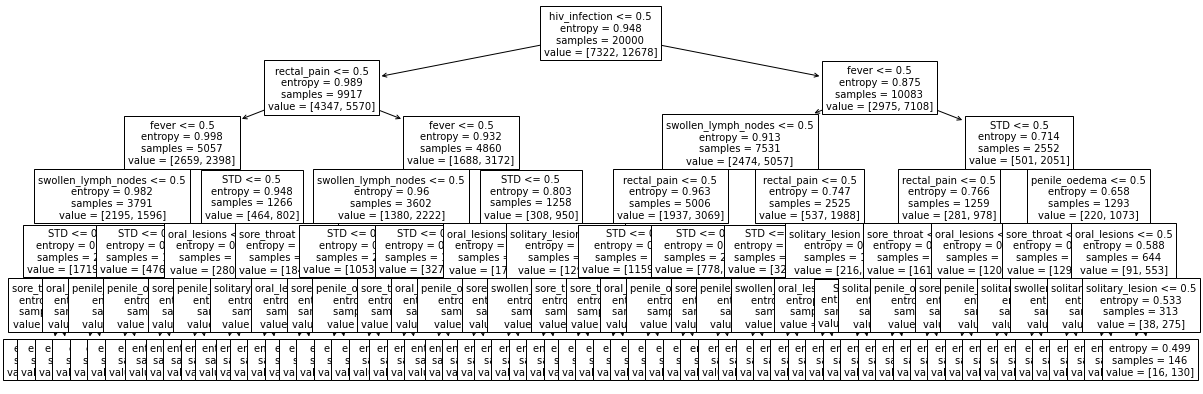

In [113]:
from sklearn import tree
plt.figure(figsize=(20,7))
tree.plot_tree(model_dt,feature_names=x_test.columns,fontsize=10)
plt.show()

## Random Forest Classifier

In [114]:
from sklearn.ensemble import RandomForestClassifier
model_rf= RandomForestClassifier()

In [115]:
params= {'n_estimators':[200,250,300,400],
         'criterion':['gini','entropy'],
         'max_depth':[4,5,6,7]}

In [116]:
gscv=GridSearchCV(estimator=model_rf,
                 param_grid=params,
                 scoring='accuracy',
                 cv=2,
                 verbose=3)

In [117]:
gscv.fit(x_train,y_train)

Fitting 2 folds for each of 32 candidates, totalling 64 fits
[CV 1/2] END criterion=gini, max_depth=4, n_estimators=200;, score=0.678 total time=   0.4s
[CV 2/2] END criterion=gini, max_depth=4, n_estimators=200;, score=0.678 total time=   0.4s
[CV 1/2] END criterion=gini, max_depth=4, n_estimators=250;, score=0.679 total time=   0.5s
[CV 2/2] END criterion=gini, max_depth=4, n_estimators=250;, score=0.678 total time=   0.5s
[CV 1/2] END criterion=gini, max_depth=4, n_estimators=300;, score=0.679 total time=   0.6s
[CV 2/2] END criterion=gini, max_depth=4, n_estimators=300;, score=0.679 total time=   0.6s
[CV 1/2] END criterion=gini, max_depth=4, n_estimators=400;, score=0.678 total time=   0.9s
[CV 2/2] END criterion=gini, max_depth=4, n_estimators=400;, score=0.677 total time=   0.9s
[CV 1/2] END criterion=gini, max_depth=5, n_estimators=200;, score=0.683 total time=   0.4s
[CV 2/2] END criterion=gini, max_depth=5, n_estimators=200;, score=0.685 total time=   0.4s
[CV 1/2] END criter

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7],
                         'n_estimators': [200, 250, 300, 400]},
             scoring='accuracy', verbose=3)

In [118]:
gscv.best_score_

0.6893499999999999

In [119]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 200}

In [120]:
model_rf = RandomForestClassifier(**gscv.best_params_)

In [121]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=200)

In [122]:
y_pred_rf= model_rf.predict(x_test)

In [123]:
validation(y_test,y_pred_rf)

Confusion matrix 
 [[ 555 1214]
 [ 297 2934]]
Accuracy:  0.6978
Recall : 0.9080779944289693
Precision : 0.7073288331726133
F1 score : 0.7952297059222118


## ADA Boosting

In [124]:
from sklearn.ensemble import AdaBoostClassifier
model_ada= AdaBoostClassifier()

In [125]:
params={'n_estimators':[100,150,200,250,300,400],
       'learning_rate':[0.001,0.1]}

gscv=GridSearchCV(estimator=model_ada,
                 param_grid=params,
                 scoring='accuracy',
                 cv=3,
                 verbose=3)

In [126]:
gscv.fit(x_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END learning_rate=0.001, n_estimators=100;, score=0.634 total time=   0.3s
[CV 2/3] END learning_rate=0.001, n_estimators=100;, score=0.634 total time=   0.3s
[CV 3/3] END learning_rate=0.001, n_estimators=100;, score=0.634 total time=   0.3s
[CV 1/3] END learning_rate=0.001, n_estimators=150;, score=0.634 total time=   0.6s
[CV 2/3] END learning_rate=0.001, n_estimators=150;, score=0.634 total time=   0.5s
[CV 3/3] END learning_rate=0.001, n_estimators=150;, score=0.634 total time=   0.6s
[CV 1/3] END learning_rate=0.001, n_estimators=200;, score=0.634 total time=   0.8s
[CV 2/3] END learning_rate=0.001, n_estimators=200;, score=0.634 total time=   0.8s
[CV 3/3] END learning_rate=0.001, n_estimators=200;, score=0.634 total time=   0.8s
[CV 1/3] END learning_rate=0.001, n_estimators=250;, score=0.634 total time=   1.0s
[CV 2/3] END learning_rate=0.001, n_estimators=250;, score=0.634 total time=   1.0s
[CV 3/3] END le

GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.1],
                         'n_estimators': [100, 150, 200, 250, 300, 400]},
             scoring='accuracy', verbose=3)

In [127]:
gscv.best_score_

0.6912500534589233

In [128]:
gscv.best_params_

{'learning_rate': 0.1, 'n_estimators': 150}

In [129]:
model_ada = AdaBoostClassifier(**gscv.best_params_)
model_ada.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=150)

In [130]:
y_pred_ada= model_ada.predict(x_test)

In [131]:
validation(y_test,y_pred_ada)

Confusion matrix 
 [[ 623 1146]
 [ 363 2868]]
Accuracy:  0.6982
Recall : 0.8876508820798514
Precision : 0.7144992526158446
F1 score : 0.7917184265010352


In [160]:
print('Accuracy\t \t',accuracy_score(y_test,y_pred))
print('KNN Accuracy\t \t',accuracy_score(y_test,y_pred_knn))
print("Naive baye's Accuracy\t",accuracy_score(y_test,y_pred_nb))
print("Decision Tree Accuracy\t",accuracy_score(y_test,y_pred_dt))
print("Random Forest Accuracy\t",accuracy_score(y_test,y_pred_rf))
print("Ada Boosting Accuracy\t",accuracy_score(y_test,y_pred_ada))

Accuracy	 	 0.6966
KNN Accuracy	 	 0.6406
Naive baye's Accuracy	 0.6694
Decision Tree Accuracy	 0.6894
Random Forest Accuracy	 0.6978
Ada Boosting Accuracy	 0.6982
